In [89]:
import pandas as pd
import matplotlib.pyplot as plt
columns=['SCN','CT','UCSI','UCSH','MA','SECS','BN','BC','NN','Mit','Class']

In [90]:
bc=pd.read_csv("file:///C:/Users/WIN%2010/Downloads/breast-cancer-wisconsin.data",header=1,names=columns,na_values='?')

In [91]:
bc.head(10)

,SCN,CT,UCSI,UCSH,MA,SECS,BN,BC,NN,Mit,Class
0,1015425,3,1,1,1,2,2.0,3,1,1,2
1,1016277,6,8,8,1,3,4.0,3,7,1,2
2,1017023,4,1,1,3,2,1.0,3,1,1,2
3,1017122,8,10,10,8,7,10.0,9,7,1,4
4,1018099,1,1,1,1,2,10.0,3,1,1,2
5,1018561,2,1,2,1,2,1.0,3,1,1,2
6,1033078,2,1,1,1,2,1.0,1,1,5,2
7,1033078,4,2,1,1,2,1.0,2,1,1,2
8,1035283,1,1,1,1,1,1.0,3,1,1,2
9,1036172,2,1,1,1,2,1.0,2,1,1,2


In [92]:
columns=['SCN','CT','UCSI','UCSH','MA','SECS','BN','BC','NN','Mit','Class']

In [93]:
bc.BN.fillna(bc.BN.mean(),inplace=True)

In [94]:
bc.BN.isnull().sum()

0

In [95]:
bc.isnull().sum()

SCN      0
CT       0
UCSI     0
UCSH     0
MA       0
SECS     0
BN       0
BC       0
NN       0
Mit      0
Class    0
dtype: int64

In [32]:
bc.isnull().sum()

SCN      0
CT       0
UCSI     0
UCSH     0
MA       0
SECS     0
BN       0
BC       0
NN       0
Mit      0
Class    0
dtype: int64

In [96]:
bc.BN.unique()

array([ 2.        ,  4.        ,  1.        , 10.        ,  3.        ,
        9.        ,  7.        ,  3.53891336,  5.        ,  8.        ,
        6.        ])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de7c23f880>,
 'caps': [<matplotlib.lines.Line2D at 0x1de7c23ffa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de7c23f4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1de7c24e700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de7c24ea90>],
 'means': []}

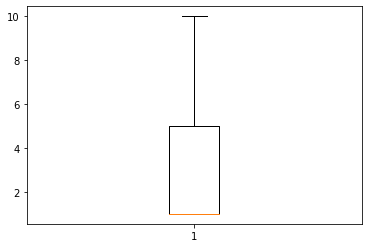

In [97]:
plt.boxplot(bc.BN)

{'whiskers': [<matplotlib.lines.Line2D at 0x1de796ebdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1de7a6cc550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de796eba60>],
 'medians': [<matplotlib.lines.Line2D at 0x1de7a6ccc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de7a6d6040>],
 'means': []}

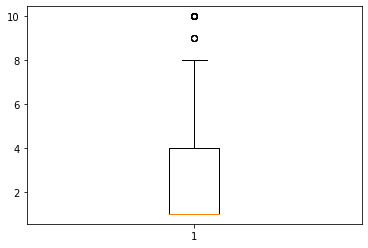

In [46]:
plt.boxplot(bc.MA)

In [98]:
bc.BN.describe()

count    697.000000
mean       3.538913
std        3.597417
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: BN, dtype: float64

In [99]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SCN     697 non-null    int64  
 1   CT      697 non-null    int64  
 2   UCSI    697 non-null    int64  
 3   UCSH    697 non-null    int64  
 4   MA      697 non-null    int64  
 5   SECS    697 non-null    int64  
 6   BN      697 non-null    float64
 7   BC      697 non-null    int64  
 8   NN      697 non-null    int64  
 9   Mit     697 non-null    int64  
 10  Class   697 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.0 KB


In [100]:
x=bc[['SCN','CT','UCSI','UCSH','MA','SECS','BN','BC','NN','Class']]
y=bc.Class

In [118]:
x=bc.drop("Class",axis=1)
y=bc["Class"]

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)

In [103]:
train_x.shape

(557, 10)

In [104]:
train_y.shape

(557,)

In [105]:
test_x.shape

(140, 10)

In [106]:
test_y.shape

(140,)

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
model=LogisticRegression().fit(train_x,train_y)

In [109]:
model.score(train_x,train_y)

0.6570915619389587

In [110]:
model.intercept_

array([-3.47910955e-13])

In [111]:
model.coef_

array([[-6.59515663e-07,  2.16991195e-11,  2.66014398e-11,
         2.60119219e-11,  2.17261936e-11,  1.50203554e-11,
         3.27011115e-11,  1.95740318e-11,  2.32891767e-11,
         9.89517235e-12]])

In [112]:
predict_y=model.predict(train_x)

In [114]:
model.predict_proba(test_x)

array([[0.69300541, 0.30699459],
       [0.6867876 , 0.3132124 ],
       [0.6821831 , 0.3178169 ],
       [0.55619062, 0.44380938],
       [0.69177562, 0.30822438],
       [0.68485439, 0.31514561],
       [0.68827062, 0.31172938],
       [0.69002691, 0.30997309],
       [0.68393399, 0.31606601],
       [0.68774937, 0.31225063],
       [0.70075781, 0.29924219],
       [0.59140515, 0.40859485],
       [0.67502191, 0.32497809],
       [0.70550418, 0.29449582],
       [0.66827624, 0.33172376],
       [0.69938063, 0.30061937],
       [0.70428674, 0.29571326],
       [0.69122185, 0.30877815],
       [0.70487291, 0.29512709],
       [0.61266013, 0.38733987],
       [0.69025017, 0.30974983],
       [0.67614157, 0.32385843],
       [0.69400422, 0.30599578],
       [0.7064247 , 0.2935753 ],
       [0.70211013, 0.29788987],
       [0.63801402, 0.36198598],
       [0.69361697, 0.30638303],
       [0.62423693, 0.37576307],
       [0.66719388, 0.33280612],
       [0.66827624, 0.33172376],
       [0.

In [128]:
from sklearn.metrics import confusion_matrix

In [131]:
confusion.matrix=metrics.confusion_matrix(test_y,predicted_value)
confusion_matrix

NameError: name 'confusion' is not defined

In [119]:
predicted_value=model.predict(test_x)
print(predicted_value)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [120]:
probability=model.predict_proba(test_x)
print(probability)

[[0.69300541 0.30699459]
 [0.6867876  0.3132124 ]
 [0.6821831  0.3178169 ]
 [0.55619062 0.44380938]
 [0.69177562 0.30822438]
 [0.68485439 0.31514561]
 [0.68827062 0.31172938]
 [0.69002691 0.30997309]
 [0.68393399 0.31606601]
 [0.68774937 0.31225063]
 [0.70075781 0.29924219]
 [0.59140515 0.40859485]
 [0.67502191 0.32497809]
 [0.70550418 0.29449582]
 [0.66827624 0.33172376]
 [0.69938063 0.30061937]
 [0.70428674 0.29571326]
 [0.69122185 0.30877815]
 [0.70487291 0.29512709]
 [0.61266013 0.38733987]
 [0.69025017 0.30974983]
 [0.67614157 0.32385843]
 [0.69400422 0.30599578]
 [0.7064247  0.2935753 ]
 [0.70211013 0.29788987]
 [0.63801402 0.36198598]
 [0.69361697 0.30638303]
 [0.62423693 0.37576307]
 [0.66719388 0.33280612]
 [0.66827624 0.33172376]
 [0.66891674 0.33108326]
 [0.7019018  0.2980982 ]
 [0.71152438 0.28847562]
 [0.6962362  0.3037638 ]
 [0.57019998 0.42980002]
 [0.69880251 0.30119749]
 [0.67388575 0.32611425]
 [0.69789709 0.30210291]
 [0.68035907 0.31964093]
 [0.68413711 0.31586289]
